# Benford  for Python - A Census Test Case

### Current version: 0.1.0.3

# Census Test Case

### Benford for python is a Package in PyPi (as of December 2017). I discovered this package and on Milcent's github page https://github.com/milcent/benford_py and wanted to run a test using some census data. My test is adapted from Milcent's notebook. 


### I chose to use census data as it is known to be a Benford compliant dataset.  Briefly, Benford's Law deals with the  the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

### For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. By contrast, if the digits were distributed uniformly, they would each occur about 11.1% of the time (Wikipedia).    

### Benford's law is often used in forensic accounting to detect fraud and other anomalies, see (Mark Nigrini and Joseph T. Wells 'Benford's Law: Applications for Forensic Accounting, Auditing and  Fraud Detection)

### Import required libraries and the benford module.

In [56]:
%matplotlib inline

import numpy as np
import pandas as pd
#import pandas_datareader.data as web # Not a dependency, but we'll need it now.

In [57]:
import benford as bf
import os

### Load the Data

### 2010 Census data for all counties in the US is available from the US Census https://www.census.gov/data/tables/2016/demo/popest/counties-total.html#ds

In [58]:
census = pd.read_csv('/Users/donajstewart/2010CountyCensusData.csv',encoding='latin-1', index_col='County')

#### The column Population contains the county population, renamed from the original data for clarity

In [59]:
census.head()

,State,Population,2016_est
County,,,
Autauga County,Alabama,54571,54571
Baldwin County,Alabama,182265,182265
Barbour County,Alabama,27457,27457
Bibb County,Alabama,22915,22919
Blount County,Alabama,57322,57324


#### There are data for 3,143 counties

In [60]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3143 entries, Autauga County to Weston County
Data columns (total 3 columns):
State         3143 non-null object
Population    3143 non-null int64
2016_est      3143 non-null int64
dtypes: int64(2), object(1)
memory usage: 98.2+ KB


### First Digits Test

### Let us see if the census data conforms to Benford's Law 

Initialized sequence with 3143 registries.

Test performed on 3143 registries.
Discarded 0 records < 1 after preparation.


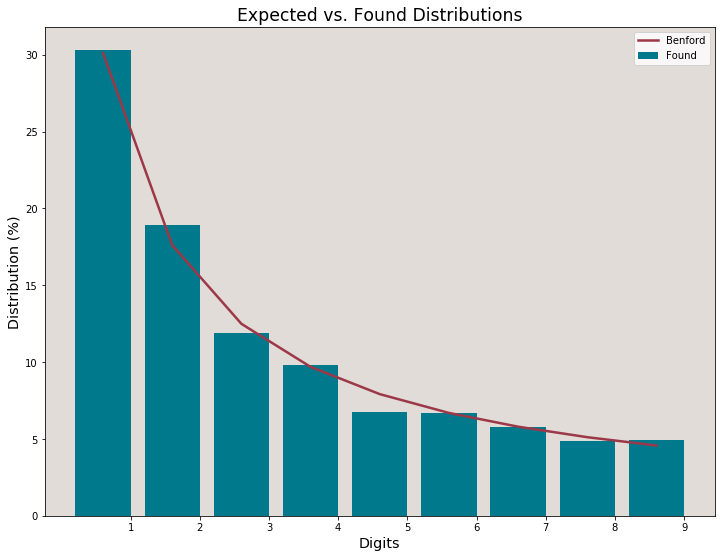

In [61]:
census_1dig=bf.first_digits(census.Population, digs=1) 

### The *first_digits* function draws the plot (default) with bars for the digits found frequencies and a line corresponding to the expected Benford proportions (above). It also returns a DataFrame object with Counts, Found proportions and Expected values for each digit in the data (below).

###The census data shows a h

In [62]:
census_1dig

,Counts,Found,Expected
First_1_Dig,,,
1,953,0.303213,0.301030
2,594,0.188991,0.176091
3,374,0.118995,0.124939
4,308,0.097996,0.096910
5,213,0.067770,0.079181
6,210,0.066815,0.066947
7,182,0.057906,0.057992
8,153,0.048680,0.051153
9,156,0.049634,0.045757


### First Two Digits

Initialized sequence with 3143 registries.

Test performed on 3143 registries.
Discarded 0 records < 10 after preparation.


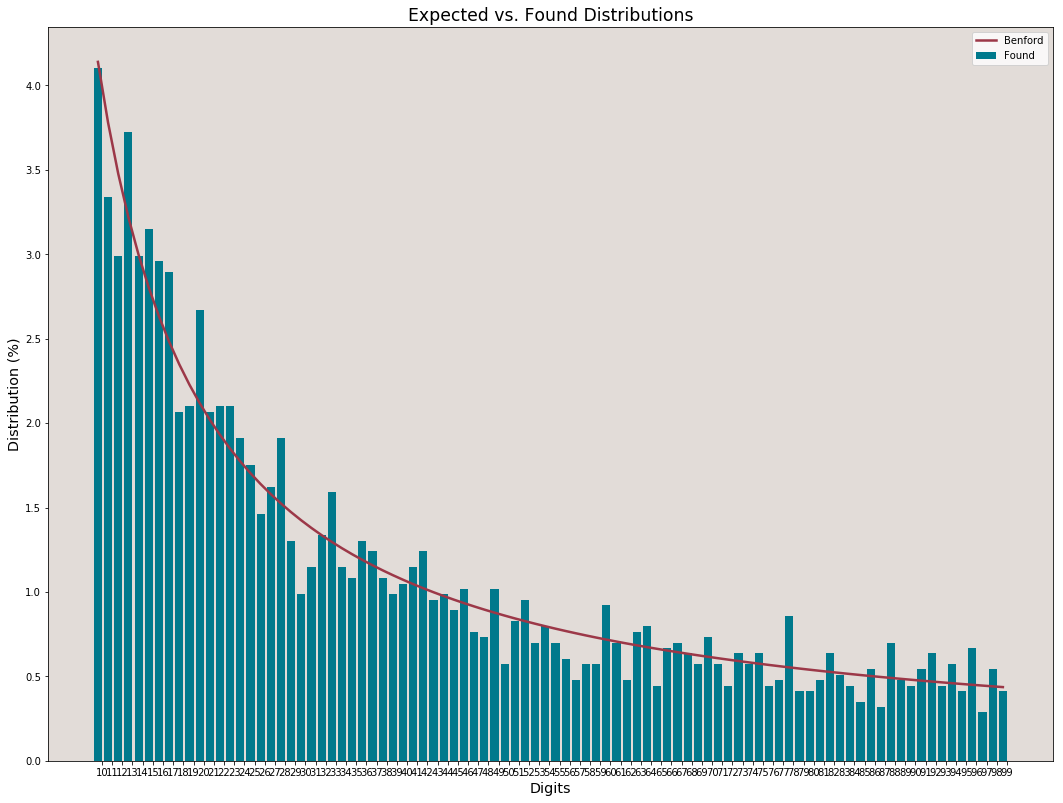

In [63]:
census_2dig = bf.first_digits(census.Population, digs=2) 

In [64]:
census_2dig.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,13,0.004136,0.004548
96,21,0.006682,0.004501
97,9,0.002864,0.004454
98,17,0.005409,0.004409
99,13,0.004136,0.004365


## Assessing conformity

### The  Z test can be applied to more precisely examing the fit to Benford's Law.
### In the digits functions, you can turn it on by setting the parameter *confidence*, which will tell the function which confidence level to consider after calculating the Z score for each proportion.

Initialized sequence with 3143 registries.

Test performed on 3143 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
78           0.005532  0.008591  2.191073
20           0.021189  0.026726  2.093433


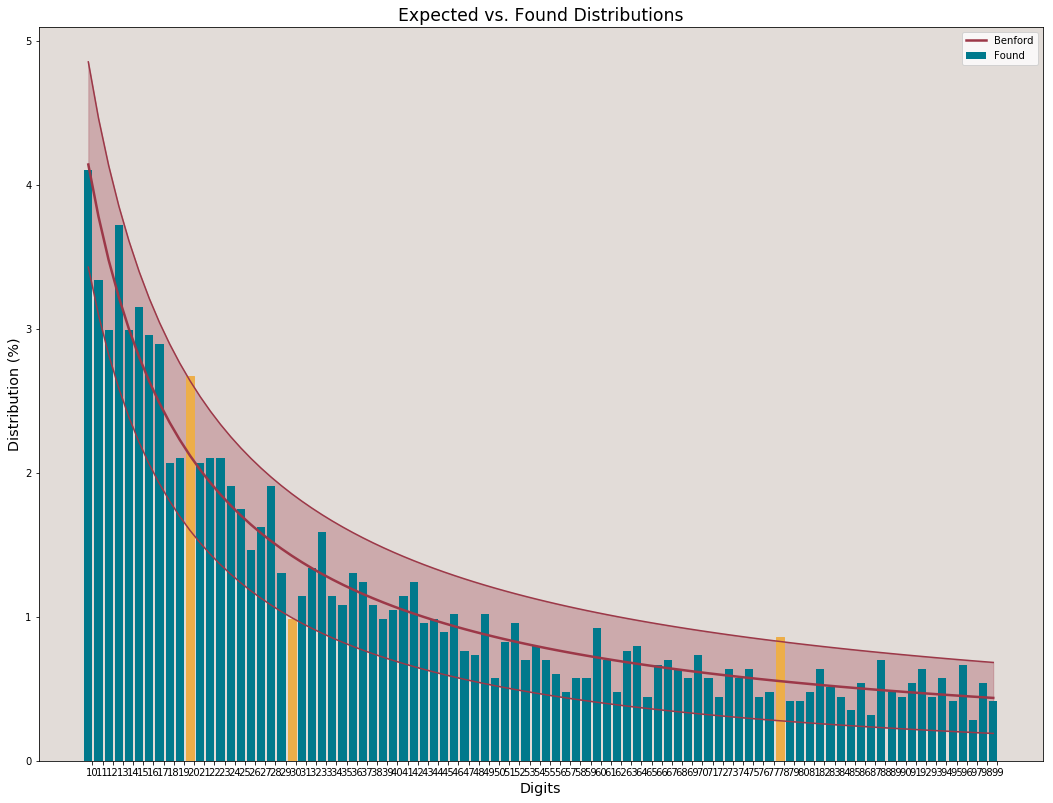

In [52]:
# For a significance of 5%, a confidence of 95
census_2dig = bf.first_digits(census.Population, digs=2,confidence=95)

### Outputs:
### <li>A DataFrame with the significant positive deviations, in descending order of the Z score. In this example the first 2 digits '78' and '20' had Zscores that were 2 standard deviations away from the mean.(The yellow bar for the value '30' has a z-score of 1.99 and falls just below the reporting threshhold). </li>
### <li>In the plot, to the Benford Expected line, it added upper and lower boundaries, based on the level of confidence by the parameter. Accordingly, it highlighted in yellow the bars with values that are outside the designated confidence interval of 95%. </li>
### The *confidence* parameter can be set to the  following values other than *None*: 80, 85, 90, 95, 99 99.9, 99.99, 99.999, 99.9999 and 99.99999.

## Conclusion

### The leading digits for the 2010 county populations in the United States display a high degree of conformity to Benford's Law. 